<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#-Introduction-" data-toc-modified-id="-Introduction--1"><span class="toc-item-num">1&nbsp;&nbsp;</span><center> Introduction </center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-Equations-of-Motion-" data-toc-modified-id="-Equations-of-Motion--1.0.1"><span class="toc-item-num">1.0.1&nbsp;&nbsp;</span><center> Equations of Motion </center></a></span></li></ul></li></ul></li><li><span><a href="#-Non-Driven-Motion-" data-toc-modified-id="-Non-Driven-Motion--2"><span class="toc-item-num">2&nbsp;&nbsp;</span><center> Non-Driven Motion </center></a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#-Motion-Analysis-" data-toc-modified-id="-Motion-Analysis--2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span><center> Motion Analysis </center></a></span></li><li><span><a href="#-Error-Analysis-" data-toc-modified-id="-Error-Analysis--2.0.2"><span class="toc-item-num">2.0.2&nbsp;&nbsp;</span><center> Error Analysis </center></a></span></li></ul></li></ul></li><li><span><a href="#-Chaotic-and-Driven-Motion-" data-toc-modified-id="-Chaotic-and-Driven-Motion--3"><span class="toc-item-num">3&nbsp;&nbsp;</span><center> Chaotic and Driven Motion </center></a></span><ul class="toc-item"><li><span><a href="#-Finding-Chaos-" data-toc-modified-id="-Finding-Chaos--3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span><center> Finding Chaos </center></a></span></li><li><span><a href="#-Poincare-Sections-" data-toc-modified-id="-Poincare-Sections--3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span><center> Poincare Sections </center></a></span><ul class="toc-item"><li><span><a href="#-1-Periodic-Motion-" data-toc-modified-id="-1-Periodic-Motion--3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span><center> 1 Periodic Motion </center></a></span></li><li><span><a href="#-3-Periodic-Motion-" data-toc-modified-id="-3-Periodic-Motion--3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span><center> 3 Periodic Motion </center></a></span></li></ul></li><li><span><a href="#-Chaotic-Motion-" data-toc-modified-id="-Chaotic-Motion--3.3"><span class="toc-item-num">3.3&nbsp;&nbsp;</span><center> Chaotic Motion </center></a></span></li></ul></li><li><span><a href="#-Visualizing-Chaotic-Motion-" data-toc-modified-id="-Visualizing-Chaotic-Motion--4"><span class="toc-item-num">4&nbsp;&nbsp;</span><center> Visualizing Chaotic Motion </center></a></span></li></ul></div>

<h1><center> Introduction </center></h1>
<div style="text-align: right"><b> Chaos in a Damped, Driven Oscillator</b> </div> 
<div style="text-align: right"><b> by: Nathan Willey</b></div>

   This project will aim to explore different facets of the damped, driven harmonic pendulum system. There will be a focus on the chaotic nature that result from these systems. We will begin by evaluating the system without any driving force, and remark on a pattern of motion that may result. Then, we will use this system to test our methods of integration and obtain the systematic error as a function of the number of time points produced by the Euler Method and RK4 method. 

   With the natural systems explored, and our methods verified we will move to study the chaos implicit in one damped and driven system. Here we will explore the chaos through position-time plots, phase space plots, poincare sections, and an interactive animation where we see the affects of differing starting positions on the system. 
   
   ---

<h3><center> Equations of Motion </center></h3>

For a simple, frictionless pendulum with mass $m$ and length $l$, we can model its motion as

$$ \frac{d^2\theta}{dt^2} +\frac{g}{l} \sin(\theta) = 0$$

When we assume a linear air resistance acts on the pendulum _and_ add an external force acting on the pendulum along its direction of motion, our equation of motion becomes as follows:

$$ \frac{d^2\theta}{dt^2} + \frac{b}{m}\frac{d\theta}{dt} + \frac{g}{l} \sin(\theta) = \frac{1}{ml} F^{\text{ext}}$$

This ODE is non-linear and has no general analytic solution. We can, however, find the motion of the system by numerically integrating the equation of motion as two coupled differential equations: 


$$\frac{d \omega}{dt} = \frac{1}{ml}F^{\text{ext}} - \frac{b}{m} \omega - \frac{g}{l} \sin(\theta)$$

$$ \frac{d \theta}{dt}  = \omega$$

---

<h1><center> Non-Driven Motion </center></h1>

With the system of differential equations above we can now integrate to solve different physical systems. To do this, I have created a class Solver() that includes functions to numerically integrate from a force via the Euler method or the RK4 method (included too is integration by the Velocity-Verlet method, but as energy is not conserved here we omit this). 

We will begin by setting up the force as above with $F^{ext} \equiv 0$ (formatted as it is to accomodate for the Solver class) and integrating via the RK4 method with some simple set of initial conditions to see the resulting motion. 

In [3]:
#common imports
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint
#custom solver class
from solver import *
%matplotlib inline
import ipywidgets as widgets
from ipywidgets import interact, interactive, fixed, interact_manual, IntProgress
from IPython.core.display import HTML
HTML("""
<style>
.output_png {
    display: table-cell;
    text-align: center;
    vertical-align: middle;
}
</style>
""")

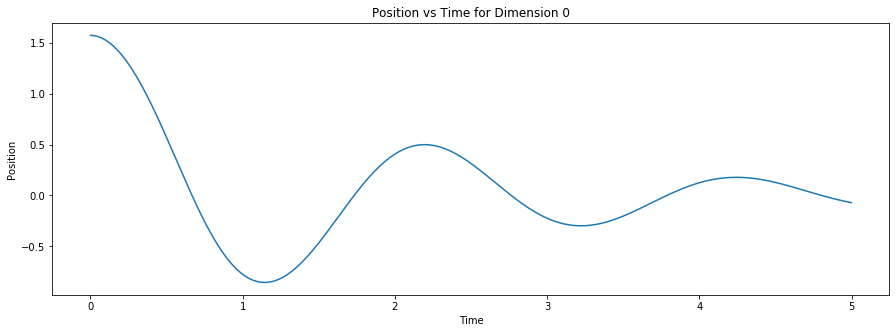

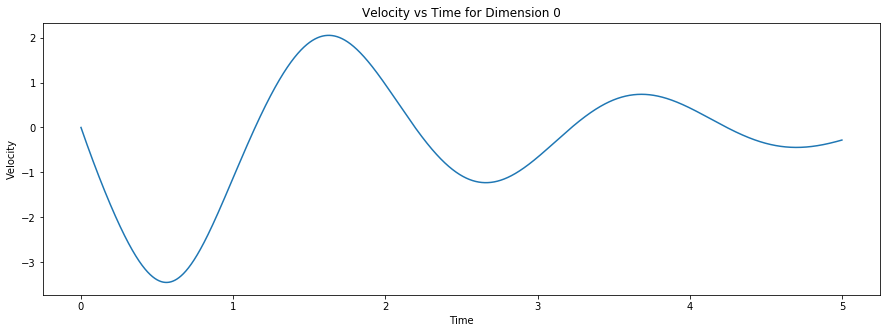

In [24]:
def Forces(r, v, t, i, m):
    
    #### CONSTANTS 
    l = 1
    m = 1
    g = 9.81
    b = 1
    F_ext = 0 
  
    F = np.zeros_like(r[0,:])
    
    #set each dimension's net force
    Fx = (1/(m*l))*F_ext - (b/(m))*v[i,0] - (g/l)*np.sin(r[i,0])
    Fy = 0
    Fz = 0
    
    F_PACK = [Fx, Fy, Fz] 
    
    #pulls the correct dim of forces to return
    for dim in range(F.shape[0]):
        F[dim] = F_PACK[dim]
    
    return F

phi0 = [np.pi/2]
omega0 = [0]

damped_pendulum = Solver(phi0, omega0, Forces)
damped_pendulum.RK4(t0 = 0, tf = 5, dt = .001)

damped_pendulum.Plot()

<h3><center> Motion Analysis </center></h3>

Here we see that with the initial conditions set in Forces, we have an underdamped system whose position converges to $\theta = 0$ with time. \
By changing the value of $b$, we can tweak the system to follow an overdamped and critically damped regime too, but this system will work well in our study of the systematic errors produced by different integration methods. 

<h3><center> Error Analysis </center></h3>

With this system above, we now want to integrate using three different integration methods, and test the local error that each produces as a function of $dt$.\
To do this, we need a solution which we regard as truth. Sadly, this pendulum system does _not_ have a general analytic solution to compare our methods against. What we instead use, is another method that is known to have a high accuracy, Python's ODEINT package. ODEINT can be treated as truth for dt over $10^{-3}$, at this point the RK4 method has similar errors. \
We treat this method as truth and take the local error of a method by measuring the difference in positions at $t=5$.\
Once this is calculated, we can plot the relative error for each method as a function of $dt$ to obtain the power law that defines the error of each method.

In [25]:
##setup for integration with ODEINT
l = 1
m = 1
g = 9.81
b = 1
F_ext = 0

phi0 = np.pi/2
omega0 = 0

def pend(y, t, l,m,g,b):
    theta, omega = y
    dydt = [omega, (1/(m*l))*F_ext - (b/(m))*omega - (g/l)*np.sin(theta)]
    return dydt

y0 = [phi0,omega0]

Error power law for Euler method: 1.01
Error power law for RK4 method: 4.18


Text(0.5, 1.0, 'Global Error for Euler and RK4 Methods log-log')

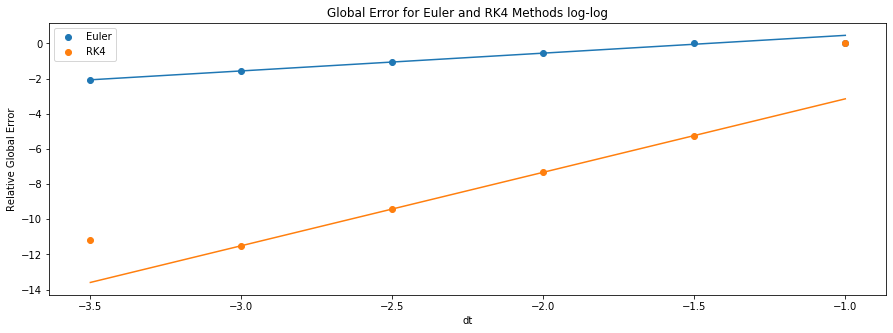

In [26]:
dt = 1/(10**(np.arange(1,4,.5)))
tf = 5

methods = ["Euler", "RK4"]

#array to store rel errors in 
errors = np.zeros([len(dt), len(methods)])


for j,method in enumerate(methods):
    for i in range(dt.shape[0]):
        t = np.arange(0,tf,dt[i])

        #calculate the position over time for the method 
        damped_pendulum = Solver([phi0], [omega0], Forces)
        eval('damped_pendulum.' + method + '(t0 = 0, tf = tf, dt = dt[i])')
        r_method = damped_pendulum.position.flatten()
        
        #calculate the position over time for odeint
        sol = odeint(pend, y0, t, args=(l,m,g,b), hmax = 0.0001)
        r_odeint, v_odeint = sol[:,0], sol[:,1]

        #find the error at t=5
        errors[i,j] = np.abs(r_method[-1] - r_odeint[-1])/np.abs(r_odeint[-1])
        
#fit power laws for global error
m1, b1 = np.polyfit(np.log10(dt)[3:], np.log10(errors[:,0])[3:],1)
m2, b2 = np.polyfit(np.log10(dt)[1:5], np.log10(errors[:,1])[1:5],1)
print("Error power law for Euler method: {:.2f}".format(m1))
print("Error power law for RK4 method: {:.2f}".format(m2))

fig = plt.figure(figsize = (15,5))
for k,method in enumerate(methods):
    plt.scatter(np.log10(dt), np.log10(errors[:,k]), label = method)
    
plt.plot(np.log10(dt), b1 + m1*np.log10(dt))
plt.plot(np.log10(dt), b2 + m2*np.log10(dt))

plt.xlabel("dt")
plt.ylabel("Relative Global Error")
plt.legend()
plt.title("Global Error for Euler and RK4 Methods log-log")

From these plots, we see that each method's errors follow a simple power law in relation to the size of our time step. The Euler method's local error goes like $dt$, whereas the RK4 method has a global error proportional to $(dt)^4$, as its name would suggest. \
These results for the global error are known to be true for these two methods, and so we are able to verify that our methods for integration are working correctly. \
Thus, we now move on to adding an external force to our system and analysing the chaotic motion that results. 

<h1><center> Chaotic and Driven Motion </center></h1>

We now add an external oscillatory force to our system $F_{ext} = A \cos (\omega_{ext} t)$.\
This system can lead to many interesting pheneomena which we will now look at.\
Most systems of this form will follow some sort of transient motion, in which the first few cycles of motion are quite varient, until the solution settles at a consistent motion, determined by the frequency and strength of the driving force. Such a system is displayed below in both pos-time/velocity-time graphs and a phase space plot to better show the convergent nature of the system.

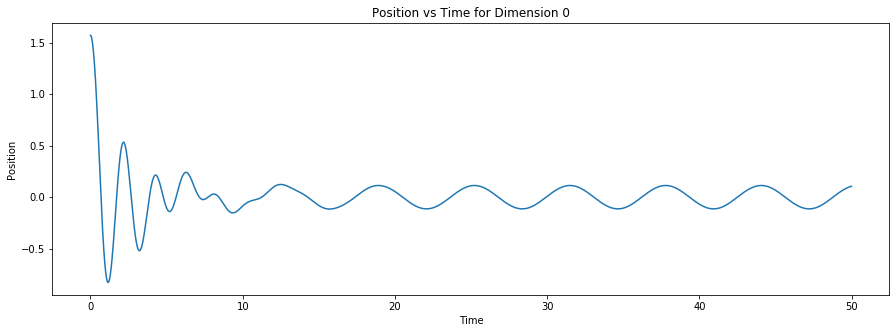

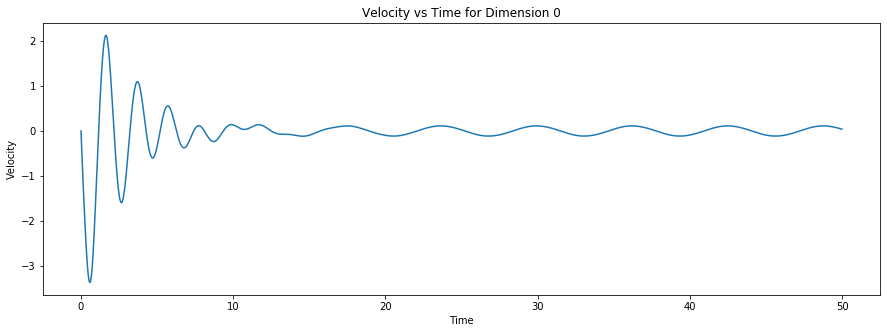

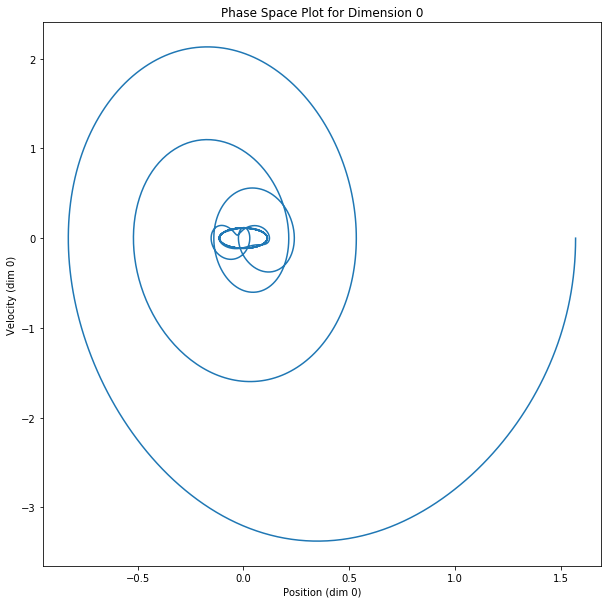

In [7]:
def Forces(r, v, t, i, m):
    
    #### CONSTANTS 
    l = 1
    g = 9.81
    b = .75
    
    #external force frequency
    omega_ext = 1
    #external force amplitude
    A = 1
    F_ext = A * np.cos(omega_ext*t[i])
  
    F = np.zeros_like(r[0,:])
    
    #set each dimension's net force
    Fx = (1/(m*l))*F_ext - (b/(m))*v[i,0] - (g/l)*np.sin(r[i,0])
    Fy = 0
    Fz = 0
    
    F_PACK = [Fx, Fy, Fz] 
    
    #pulls the correct dim of forces to return
    for dim in range(F.shape[0]):
        F[dim] = F_PACK[dim]
    
    return F

phi0 = [np.pi/2]
omega0 = [0]

damped_pendulum = Solver(phi0, omega0, Forces)
damped_pendulum.RK4(t0 = 0, tf = 50, dt = .01)
damped_pendulum.Plot('time')
damped_pendulum.Plot('phase')

For every system from here on out, we let $b = 0.75$ (the dampening constant).\
In this system, we let the pendulum of length $l = 1$ fall from $\phi = \frac{\pi}{4}$ with a driving force of $\cos(t)$. Over time, we see the system converges towards a simple sinusoidal motion with a small amplitude around $\phi = 0$. This motion, clearly visible in phase space, is called an _attractor,_ i.e. the motion the system is attracted to.

<h2><center> Finding Chaos </center></h2>

This attractor depends both on our initial conditions and on our driving force. However, for this low driving force, our system is actually independent of the intial conditions given to it and will always converge to the same attractor.\
One main characteristic of a chaotic system is an extreme sensitivity to initial conditions. Thus we are still far from at a chaotic system. To arrive at a chaotic system, however, all we must do is increase the driving force around the ratio of unity with the pendulum's weight. We define $\gamma = F_{ext} / F_g$, and can observe different motions by changing $\gamma$.\
Below is a widget that allows you to do just that. By changing $\gamma$ we can observe the effects on the motion of the system via phase space. 

In [8]:
def ForceSlider(gamma):
    def Forces(r, v, t, i, m):

        #### CONSTANTS 
        l = 4.36
        g = 9.81
        b = .75

        #external force frequency
        omega_ext = 1
        
        #external force amplitude
        F_ext = (gamma*m*g) * np.cos(omega_ext*t[i])

        F = np.zeros_like(r[0,:])

        #set each dimension's net force
        Fx = (1/(m*l))*F_ext - (b/(m))*v[i,0] - (g/l)*np.sin(r[i,0])
        Fy = 0
        Fz = 0

        F_PACK = [Fx, Fy, Fz] 

        #pulls the correct dim of forces to return
        for dim in range(F.shape[0]):
            F[dim] = F_PACK[dim]

        return F

    phi0 = [0]
    omega0 = [0]

    damped_pendulum = Solver(phi0, omega0, Forces)
    damped_pendulum.RK4(t0 = 0, tf = 100, dt = .01)
    damped_pendulum.Plot('phase')

In [9]:
interact(ForceSlider, gamma=widgets.FloatSlider(min=.9, max=1.4, step=.01, value=1));

interactive(children=(FloatSlider(value=1.0, description='gamma', max=1.4, min=0.9, step=0.01), Output()), _do…

By playing around with the above widget, one can discover that below $\gamma = 1.09$, each motion is transient, eventually landing on some attractor. However, for a region of $\gamma$ past 1.09, the motion does __not__ settle on one simple attractor and instead moves "randomly" around in phase space-- this is exactly the chaotic motion we are looking for.\
Between _roughly_ $\gamma = 1.3$ and $\gamma = 1.4$ we have an interesting motion in which the angular velocity is periodic, but the angle is not, leading to a motion that travels with time, but still shows periodicity in its angular velocity-- this is not truly a chaotic system. \
With this in mind, what we really want to focus on are the regimes where $\gamma \in [0.9,1.25]$ where some motions are transient and some are chaotic as discussed above.\

<h2><center> Poincare Sections </center></h2>

Phase space plots are a great way to visualize the motion, but it can sometimes be difficult to determine whether motion is truly periodic from them, and they are near impossible to analyze for chaotic systems.\
For this, we can use _Poincare sections_. These plot a point in phase space for every period of the external force. If our system is to be a transient one converging towards an attractor determined by this external force, the poincare sections should be able to show us the that the motion appears at the same place in phase space for every period of our external force.\
A single dot in a poincare section suggests that our system become totally periodic to an attractor with the same frequency as our applied force. A few eventual dots in a section tells us that the system has periodic motion, but does not repeat itself every period of the attractor, and instead every few. These systems are clearly _not_ chaotic, but can help to illuminate what a Poincare section is showing us. We look at these motions' phase plots and poincare sections overlapped below.

The Poincare sections show a scatter plot of the pendulum position in phase space for every period of the external force. The color scale shows how far along in time the point is. Blue points mean that the system was there at an early cycle, and red points means it was there near the end of its motion.\
Thus, we expect to see blue points showing the transient motion of the system, and dark red points showing the real Poincare section of the periodic motion. 

<h3><center> 1 Periodic Motion </center></h3>

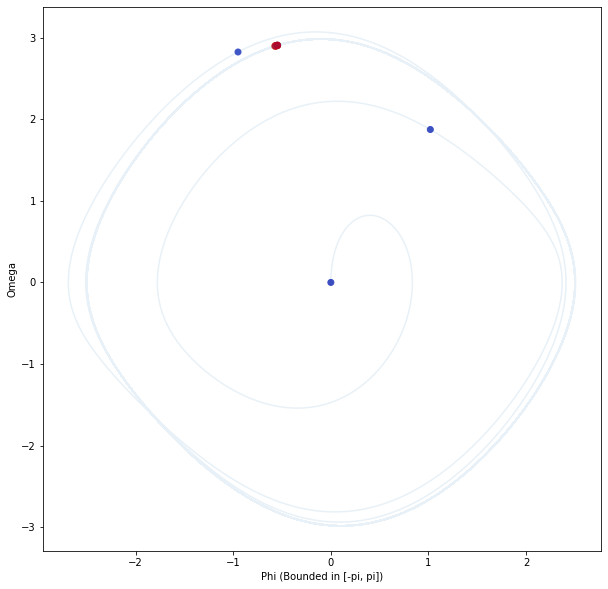

In [13]:
# 3 period 
gamma = .9
def Forces(r, v, t, i, m):
    
    #### CONSTANTS 
    omega_ext = 1
    #wraps g,l into one parameter
    omega_02 = 2.25*omega_ext
    b = (3/4)*omega_ext


    #external force amplitude
    F_ext = (gamma*(omega_02)) * np.cos(omega_ext*t[i])

    F = np.zeros_like(r[0,:])

    #set each dimension's net force
    Fx = m*(F_ext - (b/(m))*v[i,0] -  omega_02 *np.sin(r[i,0]))
    Fy = 0
    Fz = 0

    F_PACK = [Fx, Fy, Fz] 

    #pulls the correct dim of forces to return
    for dim in range(F.shape[0]):
        F[dim] = F_PACK[dim]

    return F

phi0 = [0]
omega0 = [0]
tf = 100*(2*np.pi)

damped_pendulum = Solver(phi0, omega0, Forces)
damped_pendulum.RK4(t0 = 0, tf = tf, dt = .01)

fig = plt.figure(figsize = (10,10))
plt.plot((damped_pendulum.position), damped_pendulum.velocity, alpha = .1)
plt.xlabel("Phi (Bounded in [-pi, pi])")
plt.ylabel("Omega")
mask = np.isin(damped_pendulum.t, np.around(np.arange(0,tf,np.pi*2),2))
cmap = np.arange(np.sum(mask)).reshape(-1,1)
plt.scatter((damped_pendulum.position)[mask],damped_pendulum.velocity[mask], cmap = "coolwarm", c = cmap)

<h3><center> 3 Periodic Motion </center></h3>

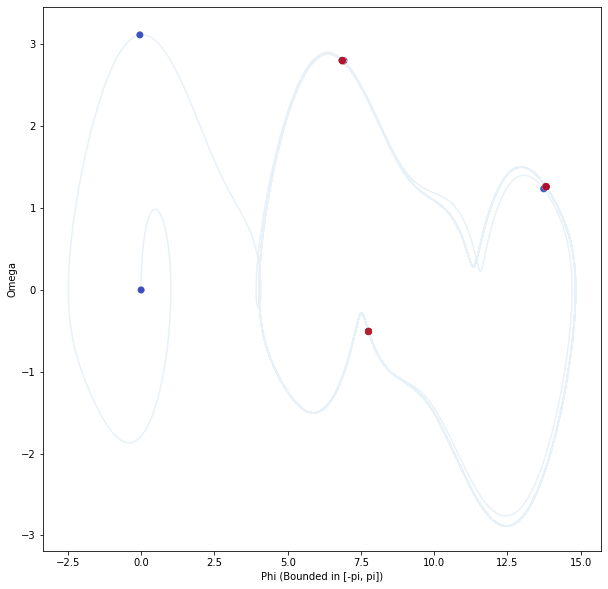

In [14]:
# 3 period 
gamma = 1.077
def Forces(r, v, t, i, m):
    
    #### CONSTANTS 
    omega_ext = 1
    #wraps g,l into one parameter
    omega_02 = 2.25*omega_ext
    b = (3/4)*omega_ext


    #external force amplitude
    F_ext = (gamma*(omega_02)) * np.cos(omega_ext*t[i])

    F = np.zeros_like(r[0,:])

    #set each dimension's net force
    Fx = m*(F_ext - (b/(m))*v[i,0] -  omega_02 *np.sin(r[i,0]))
    Fy = 0
    Fz = 0

    F_PACK = [Fx, Fy, Fz] 

    #pulls the correct dim of forces to return
    for dim in range(F.shape[0]):
        F[dim] = F_PACK[dim]

    return F

phi0 = [0]
omega0 = [0]
tf = 100*(2*np.pi)

damped_pendulum = Solver(phi0, omega0, Forces)
damped_pendulum.RK4(t0 = 0, tf = tf, dt = .01)


fig = plt.figure(figsize = (10,10))
plt.plot((damped_pendulum.position), damped_pendulum.velocity, alpha = .1)
plt.xlabel("Phi (Bounded in [-pi, pi])")
plt.ylabel("Omega")
mask = np.isin(damped_pendulum.t, np.around(np.arange(0,tf,np.pi*2),2))
cmap = np.arange(np.sum(mask)).reshape(-1,1)
plt.scatter((damped_pendulum.position)[mask],damped_pendulum.velocity[mask], cmap = "coolwarm", c = cmap)

Above we have two cases. In the first, we have a simple periodic solution where the motion repeats itself every period of the external force. Thus, we see one red point showing where the system ends up every cycle. This is a 1 periodic, non chaotic motion. 

In the second, we still have a periodic motion, but instead have three red points. This means that the system repeats itself every 3 periods of the external force. We call this motion 3 periodic. 

These examples serve as good visualizations of how the Poincare sections work in relation to the pendulum's motion through phase space. Now, we can move to a truly chaotic system and observe the Poincare sections of one.

<h2><center> Chaotic Motion </center></h2>

For many of the chaotic systems, the motion can move away from the origin in phase space. Yet in this system we can bound the motion within $[-\pi, \pi]$, as phi is an angle. By doing this, we can better see whether motion is periodic or chaotic, and extract a very interesting picture from a chaotic system.\
Below, we choose a chaotic system with $\gamma = 1.2$. One can look at the phase space motion using the slider from before. We see this system does not seem to settle down to any sort of motion. Now we can take its Poincare section and see if its location at each period gives us any information.

In [15]:
#given a phi array, bounds the values between -pi and pi
def transformation(phi):
    bounded_phi = np.copy(phi)
    for i in range(phi.shape[0]):
        if bounded_phi[i] >= np.pi:
            bounded_phi[i:] -= (2*np.pi)
        elif  bounded_phi[i] <= -np.pi: 
            bounded_phi[i:] += (2*np.pi)
    return bounded_phi

Text(0.5, 1.0, 'Poincare Section for 10,000 Cycles of Chaotic Pendulum Motion')

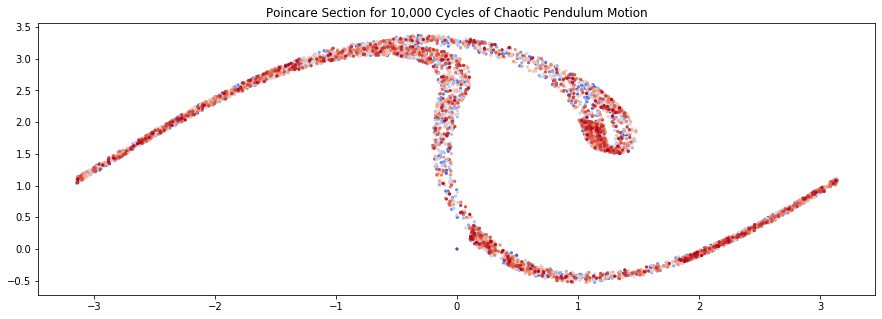

In [16]:
# chaotic
gamma = 1.2
def Forces(r, v, t, i, m):
    
    #### CONSTANTS 
    omega_ext = 1
    #wraps g,l into one parameter
    omega_02 = 2.25*omega_ext
    b = (3/4)*omega_ext


    #external force amplitude
    F_ext = (gamma*(omega_02)) * np.cos(omega_ext*t[i])

    F = np.zeros_like(r[0,:])

    #set each dimension's net force
    Fx = m*(F_ext - (b/(m))*v[i,0] -  omega_02 *np.sin(r[i,0]))
    Fy = 0
    Fz = 0

    F_PACK = [Fx, Fy, Fz] 

    #pulls the correct dim of forces to return
    for dim in range(F.shape[0]):
        F[dim] = F_PACK[dim]

    return F

phi0 = [0]
omega0 = [0]
tf = 10000*(2*np.pi)

damped_pendulum = Solver(phi0, omega0, Forces)
damped_pendulum.RK4(t0 = 0, tf = tf, dt = .1)


#bound phi between 0 and 2pi 

fig = plt.figure(figsize = (15,5))

mask = np.isin(damped_pendulum.t, np.around(np.arange(0,tf,np.pi*2),1))
cmap = np.arange(np.sum(mask)).reshape(-1,1)
plt.scatter(transformation(damped_pendulum.position)[mask],damped_pendulum.velocity[mask], s = 5, cmap = "coolwarm", c = cmap)
plt.title("Poincare Section for 10,000 Cycles of Chaotic Pendulum Motion")

First of all we note the plain and expected fact that for a chaotic system, there is no "x" red points, where the motion concentrates and follows with each cycle. Instead, the motion at each external force cylce are more random as the motion has no periodicity.\
That aside, we see something _much_ more interesting in the diagram above. The Poincare sections are not randomly distributed, but actually follow a pattern, and together make some sort of attractor, through not just a point or even a line in phase space. Though I lack the computation and time to prove it here, the Poincare section is actually a fractal in phase space. These fractals are called __strange attractors__. \
This shows us a fascinating link between chaotic motion and fractals, a seemigly much more mathematical and abstract concept!

Though not all chaotic motion will show a full strange attractor like this one, the key to chaotic motion via Poincare sections is that the section does not converge to a finite set of points with time. 

So we have evidently here motion that does not repeat itself with time, a key component of chaotic motion. The other main component that makes motion chaotic is an extreme dependence on initial conditions. We now move to test this by letting our system run with $\phi_0 = \frac{\pi}{4}$ and $\phi_0 = \frac{\pi}{4} - .0001$ and observing the behavior of the motion.

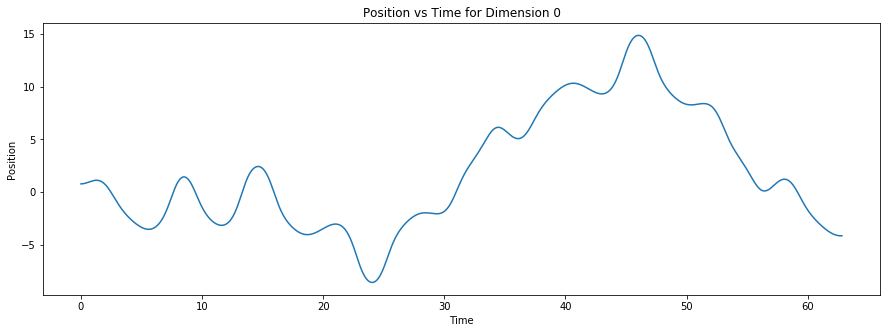

Resulting motion changing initial conditions by 0.0001 radian:


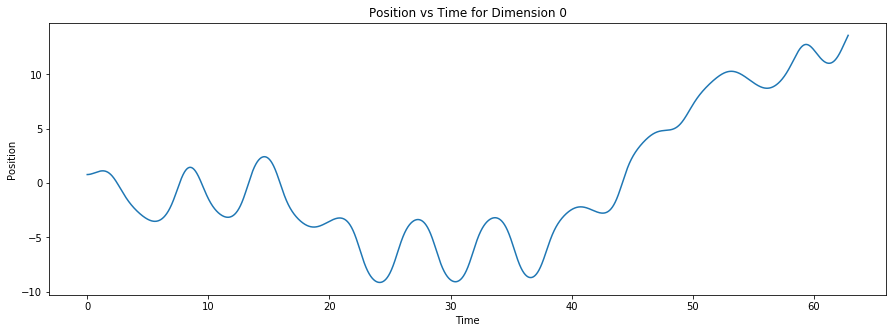

In [17]:
phi0 = [np.pi/4]
omega0 = [0]
tf = 10*(2*np.pi)

chaotic_pendulum_1 = Solver(phi0, omega0, Forces)
chaotic_pendulum_1.RK4(t0 = 0, tf = tf, dt = .001)
chaotic_pendulum_1.Plot('time', V = False)

print("Resulting motion changing initial conditions by 0.0001 radian:")

phi0 = [np.pi/4 - 0.001]
omega0 = [0]
tf = 10*(2*np.pi)

chaotic_pendulum_2 = Solver(phi0, omega0, Forces)
chaotic_pendulum_2.RK4(t0 = 0, tf = tf, dt = .001)
chaotic_pendulum_2.Plot('time', V = False)

From above we can easily see the chaos in this system. Changing our initial angle by 0.01% caused totally different resulting motion! In fact we can see this on a larger scale by plotting the final location of the pendulum after 10 cycles of external force for varying intial angles. 

Text(0.5, 1.0, 'Randomness of Final Position with Nearby Initial Conditions')

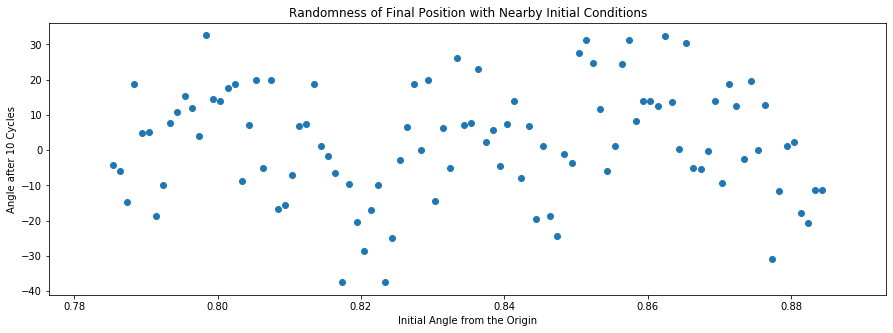

In [18]:
#range of initial angles 
initials = np.arange(np.pi/4, np.pi/4+.1, .001)

omega0 = [0]
tf = 10*(2*np.pi)

final_pos = np.zeros_like(initials)
for i in (range(initials.shape[0])):

    phi0 = [initials[i]]
    omega0 = [0]
    chaotic_pendulum = Solver(phi0, omega0, Forces)
    chaotic_pendulum.RK4(t0 = 0, tf = tf, dt = .01)
    final_pos[i] = chaotic_pendulum.position[-1]
    
plt.figure(figsize = (15,5))
plt.scatter(initials, final_pos)
plt.xlabel("Initial Angle from the Origin")
plt.ylabel("Angle after 10 Cycles")
plt.title("Randomness of Final Position with Nearby Initial Conditions")

<h1><center> Visualizing Chaotic Motion </center></h1>

We've seen chaotic motion in a few forms now, but a super helpful way to visualize it is animating it exactly how it would look to us in reality.\
We can do this in a relatively simple way through Jupyter notebook using matplotlib, and move to model the chaotic system we've looked at for the past few questions. 

If you are viewing this as a Jupyter Notebook, the next cell will ask you to enter initial positions for a set of two pendulums. Then the cell after will animate their motions over time. Even if you choose two pendulum's with nearly identical starting positions, the animation will show you that eventually their motions will diverge with time as we saw for a specific example of $\phi_0 = \frac{\pi}{4}, \frac{\pi}{4}-.001$. 

With this animation, one can explore visually the nature of this system and get a better feel for how initial condtions affect a chaotic system.

In [19]:
phi01 = [float(input("Enter an initial angle for the first pendulum: "))]
phi02 = [float(input("Enter an initial angle for the second pendulum: "))]
print("\n Computing...")

omega0 = [0]
tf = 10*(2*np.pi)

chaotic_pendulum_1 = Solver(phi01, omega0, Forces)
chaotic_pendulum_1.RK4(t0 = 0, tf = tf, dt = .001)

chaotic_pendulum_2 = Solver(phi02, omega0, Forces)
chaotic_pendulum_2.RK4(t0 = 0, tf = tf, dt = .001)

print("\n Computation complete. Final deviation: {:.2f}".format(abs(chaotic_pendulum_1.position.flatten()[-1] - chaotic_pendulum_2.position.flatten()[-1])))

Enter an initial angle for the first pendulum: 1
Enter an initial angle for the second pendulum: 1.001

 Computing...

 Computation complete. Final deviation: 2.37


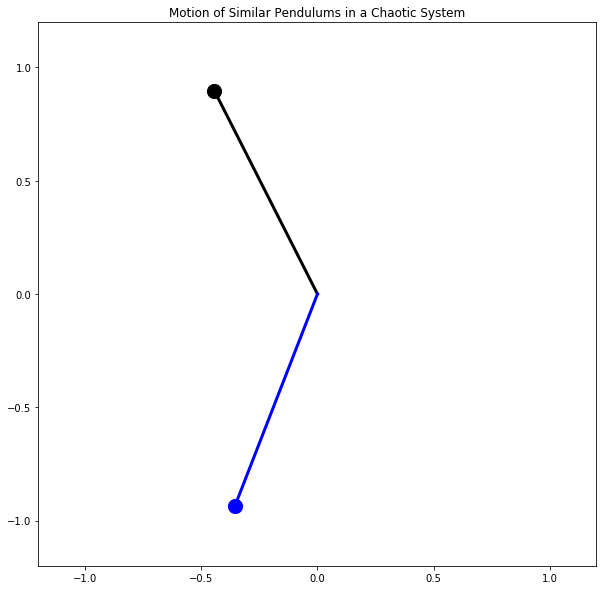

<Figure size 720x720 with 0 Axes>

In [27]:
from IPython.display import display, clear_output
import time  
fig = plt.figure(figsize = (10,10))
wait_time = .01
anim_speed = 100

n = chaotic_pendulum_1.position.shape[0]
phi1 = chaotic_pendulum_1.position.flatten()
phi2 = chaotic_pendulum_2.position.flatten()

for i in range(n):
    if i%anim_speed == 0:
        #pendulum 1 
        plt.scatter(np.sin(phi1[i]),-np.cos(phi1[i]), s = 200, color = 'black')
        plt.plot([0, np.sin(phi1[i])], [0, -np.cos(phi1[i])], color = 'black', linewidth = 3)
        
        #pendulum 2 
        plt.scatter(np.sin(phi2[i]),-np.cos(phi2[i]), s = 200, color = 'blue')
        plt.plot([0, np.sin(phi2[i])], [0, -np.cos(phi2[i])], color = 'blue', linewidth = 3)
        
        plt.xlim(-1.2,1.2)
        plt.ylim(-1.2,1.2)
        plt.title("Motion of Similar Pendulums in a Chaotic System")
        
        time.sleep(wait_time)
        clear_output(wait=True)
        display(fig)
        fig.clear()